Nama  : Hernanda Khoiriyah Putri  
NIM   : 1306620025  
Kelas : Fisika 2020  

**PENGOLAHAN CITRA DIGITAL   
Tugas 3**

In [40]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import signal

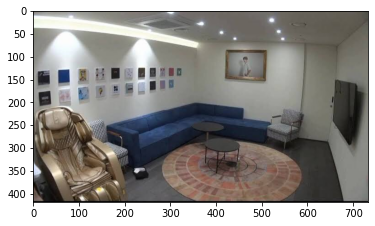

In [41]:
# Showing image
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1)
plt.imshow(image)

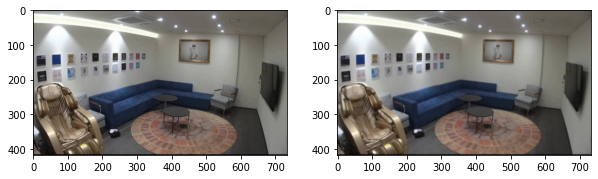

In [42]:
# Box Blur
abc = np.ones((3,3))
kernel = np.ones((3, 3), np.float32) / 9
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)

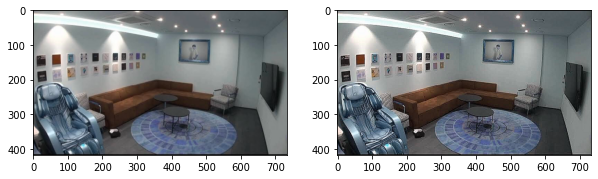

In [46]:
# Sharpening
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)

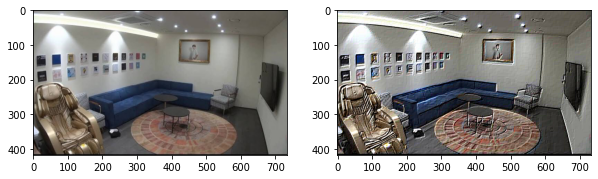

In [47]:
# Emboss
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)

In [43]:
# Correlation
# First signal 
sig1 = np.sin(np.r_[-1:1:0.1])
# Seconds signal with pi/4 phase shift. Half the size of sig1
sig2 = np.sin(np.r_[-1:0:0.1] + np.pi/4)
# Pre-allocate correlation array
corr = (len(sig1) - len(sig2) + 1) * [0]
# Go through lag components one-by-one
for l in range(len(corr)):
    corr[l] = sum([sig1[i+l] * sig2[i] for i in range(len(sig2))])

print(corr)

[-0.471998494510103, -0.24686753498102817, -0.019269956645980538, 0.20852016072607304, 0.4342268135797527, 0.6555948156484444, 0.8704123310300105, 1.076532974119988, 1.271897255587048, 1.4545531601096169, 1.62267565026772]


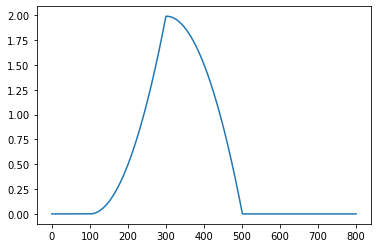

In [44]:
# Perhitungan konvolusi secara Langsung
def sig_square(x):
  return 0 if x < 3 or x > 5 else 2

def sig_triag(x):
  return 0 if x < 0 or x > 2 else x

# First signal (square pulse)
sig1 = [sig_square(x/100) for x in range(1000)]
# Seconds signal (triangle pulse)
sig2 = [sig_triag(x/100) for x in range(200)]

conv = np.convolve(sig1, sig2, mode='valid')
conv /= len(sig2) # Normalize
plt.plot(conv)

In [45]:
# Perhitungan konvolusi dengan Transformasi Fourier
x = [[1 , 0 , 0 , 0] , [0 , -1 , 0 , 0] , [0 , 0 , 3 , 0] , [0 , 0 , 0 , 1]]
x = np.array(x)
y = [[4 , 5] , [3 , 4]]
y = np.array(y)
signal.convolve2d(x , y , 'full')
s1 = np.array(x.shape)
s2 = np.array(y.shape)
size = s1 + s2 - 1
fsize = 2 ** np.ceil(np.log2(size)).astype(int)
fslice = tuple([slice(0, int(sz)) for sz in size])
new_x = np.fft.fft2(x , fsize)
new_y = np.fft.fft2(y , fsize)
result = np.fft.ifft2(new_x*new_y)[fslice].copy()
np.array(result.real , np.int32)
np.array(signal.fftconvolve(x ,y) , np.int32)

array([[ 3,  5,  0,  0,  0],
       [ 2,  0, -5,  0,  0],
       [ 0, -2,  8, 15,  0],
       [ 0,  0,  9, 16,  4],
       [ 0,  0,  0,  2,  4]])